In [1]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

import numpy as np
from scipy.stats import pearsonr
from scipy.stats import f_oneway

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Summary of Analysis

This project showcases the important of data analysis. 
Two of our hypothesis were:
* Songs with high danceability are more popular in summer as compared to winter
* Songs with low valence would be popular among winter season (as people are less happy as Canadian winters are harsh).

But upon analysis, we unveiled that all the song features remain pretty much consistent EXCEPT Valence and Duration. 
There was a statistically significant difference between valence and duration data from Q1 and Q2 which corresponds to a change from winter to spring. 
For future analysis we could compare this data with a dataset of 1000 random songs to see if there are any significant differences between values of the variables under consideration. 
Additionally we made a correlation matrix (attached in the slides) where each variable was analyzed. Yellow is the most correlation and the more darker we go, the correlation decreases.

# Import and Clean Data

We imported data a list of tracks from spotify's top 200 list in canada and used track information from spotify's API.

In [2]:
#top 200 hundred songs in Canada
CA_20200311_file = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)
CA_Q1_file = pd.read_csv('Resources/regional-ca-daily-2019-03-31.csv', header = 1)
CA_Q2_file = pd.read_csv('Resources/regional-ca-daily-2019-06-30.csv', header = 1)
CA_Q3_file = pd.read_csv('Resources/regional-ca-daily-2019-09-30.csv', header = 1)
CA_Q4_file = pd.read_csv('Resources/regional-ca-daily-2019-12-31.csv', header = 1)

top_songs_CA_Q1 = pd.DataFrame(CA_Q1_file)
top_songs_CA_Q2 = pd.DataFrame(CA_Q2_file)
top_songs_CA_Q3 = pd.DataFrame(CA_Q3_file)
top_songs_CA_Q4 = pd.DataFrame(CA_Q4_file)

top_songs_CA_Q1.head()

,Position,Track Name,Artist,Streams,URL
0,1,bad guy,Billie Eilish,288698,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...
1,2,Old Town Road,Lil Nas X,188943,https://open.spotify.com/track/53CJANUxooaqGOt...
2,3,wish you were gay,Billie Eilish,188177,https://open.spotify.com/track/3Fj47GNK2kUF0ua...
3,4,bury a friend,Billie Eilish,151088,https://open.spotify.com/track/4SSnFejRGlZikf0...
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,146852,https://open.spotify.com/track/3KkXRkHbMCARz0a...


In [3]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

master_dictionary = {}

#create a dictionary of a dictionary for the extracted data from the api
for index, dataF in enumerate(df_list):

    #Create data frame of Q1 data
    dictionary = {}
    dictionary['Duration'] = []

    for i,x in dataF.iterrows():
        dictionary['Duration'].append('hello')
    
    master_dictionary[index] = dictionary

In [6]:
#Get json output of a track - Look at sample output
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
pprint(track)
print('------------------------------------------------------')
pprint(audio_feature)

{'album': {'album_type': 'album',
           'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/757aE44tKEUQEqRuT6GnEB'},
                        'href': 'https://api.spotify.com/v1/artists/757aE44tKEUQEqRuT6GnEB',
                        'id': '757aE44tKEUQEqRuT6GnEB',
                        'name': 'Roddy Ricch',
                        'type': 'artist',
                        'uri': 'spotify:artist:757aE44tKEUQEqRuT6GnEB'}],
           'available_markets': ['AD',
                                 'AE',
                                 'AR',
                                 'AT',
                                 'AU',
                                 'BE',
                                 'BG',
                                 'BH',
                                 'BO',
                                 'BR',
                                 'CA',
                                 'CH',
                                 'CL',
                                 'C

## Create Dataframes

### Pull data for all Quarters

In [4]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

#create empty master dictionary for loop below that accumulate extracted api data
master_dictionary = {}

#Create data frame for each quarter data
for index, dataF in enumerate(df_list):
    
    dictionary = {}
    dictionary['Duration'] = []
    dictionary['Popularity'] = []
    dictionary['Track Name'] = []
    dictionary['Artist Name'] = []
    dictionary['Tempo'] = []
    dictionary['Valence'] = []
    dictionary['Speechiness'] = []
    dictionary['Danceability'] = []

    #pulls data for each track in each quarter
    for i,x in dataF.iterrows():
        url = dataF.loc[i,'URL']
        track = sp.track(url)
        audio_features = sp.audio_features(url)
        dictionary['Duration'].append(track['duration_ms'])
        dictionary['Popularity'].append(track['popularity'])
        dictionary['Track Name'].append(track['name'])
        dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
        dictionary['Tempo'].append(audio_features[0]['tempo'])
        dictionary['Valence'].append(audio_features[0]['valence'])
        dictionary['Speechiness'].append(audio_features[0]['speechiness'])
        dictionary['Danceability'].append(audio_features[0]['danceability'])
    
    #append quarter dictionary to master dictionary
    master_dictionary[index] = dictionary
    
    master_dictionary

retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


### Break master dictionary into dataframe for each quarter and combined dataframe

In [5]:
#set dataframes
df_Q1 = pd.DataFrame(master_dictionary[0])
df_Q2 = pd.DataFrame(master_dictionary[1])
df_Q3 = pd.DataFrame(master_dictionary[2])
df_Q4 = pd.DataFrame(master_dictionary[3])


quart_df_list = [df_Q1 ,df_Q2 ,df_Q3 ,df_Q4 ]
quarter_names=["Q1","Q2","Q3","Q4"]
color=["red","blue","green","orange"]
    
for dataf,name in zip(quart_df_list,quarter_names):
    dataf.name=name

#add quarter variable into each dataframe
quarter = 1
for dataF in quart_df_list:
    dataF['Quarter'] = quarter
    quarter = quarter + 1
    
#add streams columns from original csv to final data frame
df_Q1['Streams'] = top_songs_CA_Q1['Streams']
df_Q2['Streams'] = top_songs_CA_Q2['Streams']
df_Q3['Streams'] = top_songs_CA_Q3['Streams']
df_Q4['Streams'] = top_songs_CA_Q4['Streams']

df_Q1.head()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


In [6]:
#Create merge dataframe with all for quarters
merged_df = pd.DataFrame()
for dataF in quart_df_list:
    merged_df=merged_df.append(dataF,ignore_index=True)
    
print(len(merged_df))
merged_df.head()

800


,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


## Functions To Be Used In Analysis

In [91]:
def do_correlation(df, var1, var2):
    correlation = stats.pearsonr(df[var1],df[var2])
    
    print(f"{df.name}: The correlation between {var1} and {var2} is {round(correlation[0],2)}")
    
def do_boxplot(df, var):
    #does boxplot accross all quarters
    
    fig1, axs = plt.subplots(1,4,figsize=(20,10))
    ax1, ax2, ax3, ax4 = axs

    for axis,dframe in zip(axs,df):
        axis.boxplot(dframe[var])

    for axis,quarters in zip(axs,quarter_names):
        plt.setp(axis,xticklabels=[quarters])
        
    fig1.suptitle(f"Boxplot For {var} Across All Quarters", fontsize=20)

    plt.show()
    
def do_corr_analysis(df, var1, var2):
    
    fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

    ax1, ax2, ax3, ax4 = axs
    
    for axis,dframe,colors in zip(axs,df, color):
        axis.scatter(dframe[var1], dframe[var2],color=colors)
        
    for axis,quarters in zip(axs,quarter_names):
        axis.set_title(f"{var1} vs {var2} for {quarters}")   

    for label in axs:
        label.set_xlabel(var1)

    ax1.set_ylabel(var2)

    for x in quart_df_list:
        do_correlation(x, var1, var2)
        
def do_histogram(df, var):
    fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
    
    ax1, ax2, ax3, ax4 = axs
    
    for axis, dataf, colors in zip(axs,quart_df_list,color):
        axis.hist(dataf[var],color=colors)
        axis.set_xlabel(var)
        axis.set_xlim(0,max(merged_df[var])+(0.07*max(merged_df[var])))
        
    for axis,quarters in zip(axs,quarter_names):
        axis.set_title(f"Histogram of {var} for {quarters}") 

    ax1.set_ylabel('Frequency')
    

    plt.show()
    
def Do_anova(df,var):
    anova_df=[]
    for dataf in df:
        anova_df.append(dataf[var])
    
    f_oneway(anova_df)


# Dataframe Summary

In [110]:
grouped_by_quarter = merged_df.groupby("Quarter").mean()
grouped_by_quarter

,Duration,Popularity,Tempo,Valence,Speechiness,Danceability,Streams
Quarter,,,,,,,
1,197677.160,71.170,117.806420,0.441819,0.137655,0.705750,51413.46
2,201676.830,72.965,119.556690,0.508215,0.116193,0.706060,56983.13
3,190320.195,75.910,120.992890,0.501311,0.143260,0.711440,54346.11
4,193037.090,81.595,118.938155,0.463131,0.124981,0.705295,58987.33


# Danceability Analysis

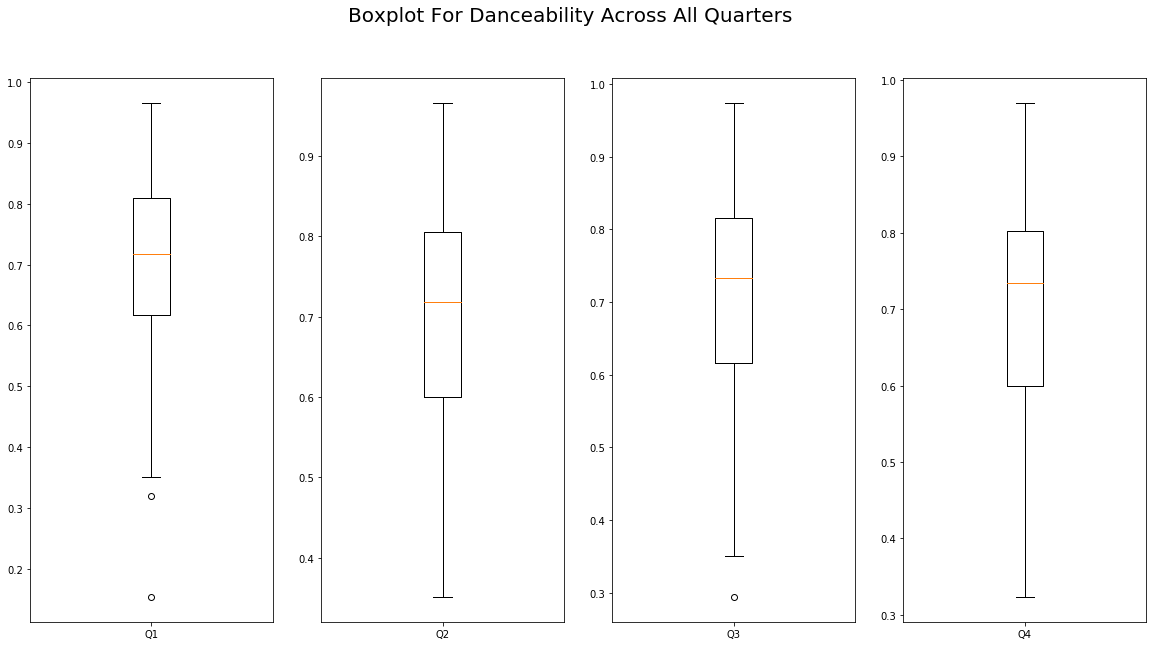

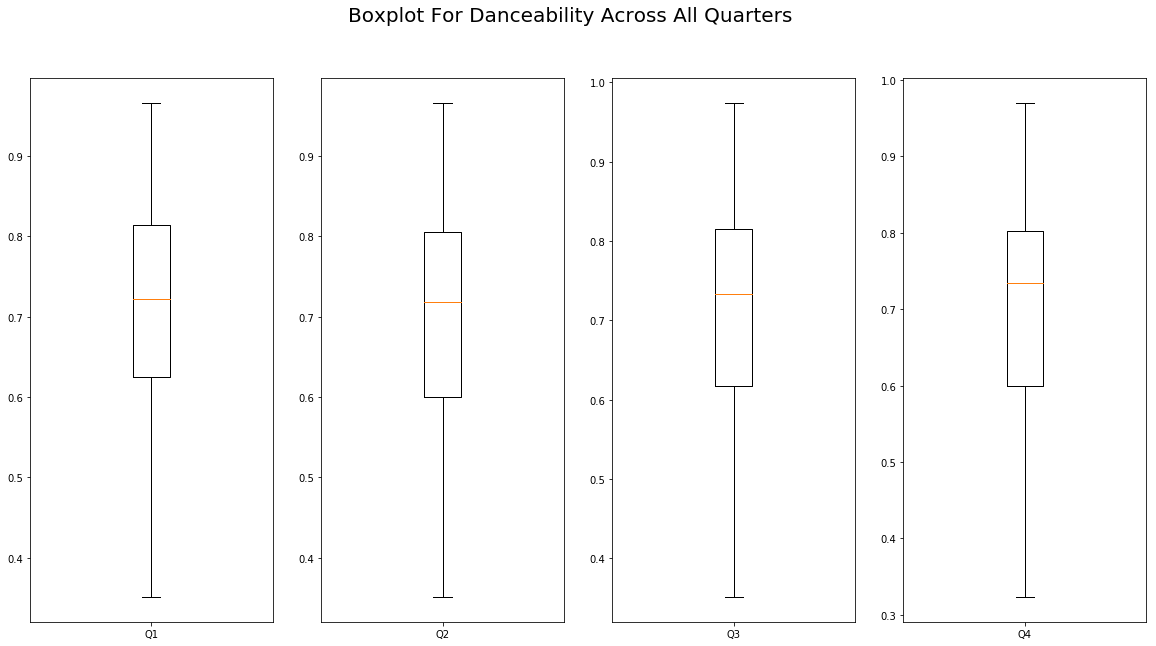

In [42]:
## finding outliers and cleaning up
do_boxplot(quart_df_list, 'Danceability')

#Removing Outliers and creating new data frames for danceability and creating a new box plot
dance_q1=df_Q1[(df_Q1['Danceability']>0.35)]
dance_q2=df_Q2
dance_q3=df_Q3[(df_Q3['Danceability']>0.3)]
dance_q4=df_Q4

dance_df_list = [dance_q1, dance_q2, dance_q3, dance_q4]

do_boxplot(dance_df_list, 'Danceability')

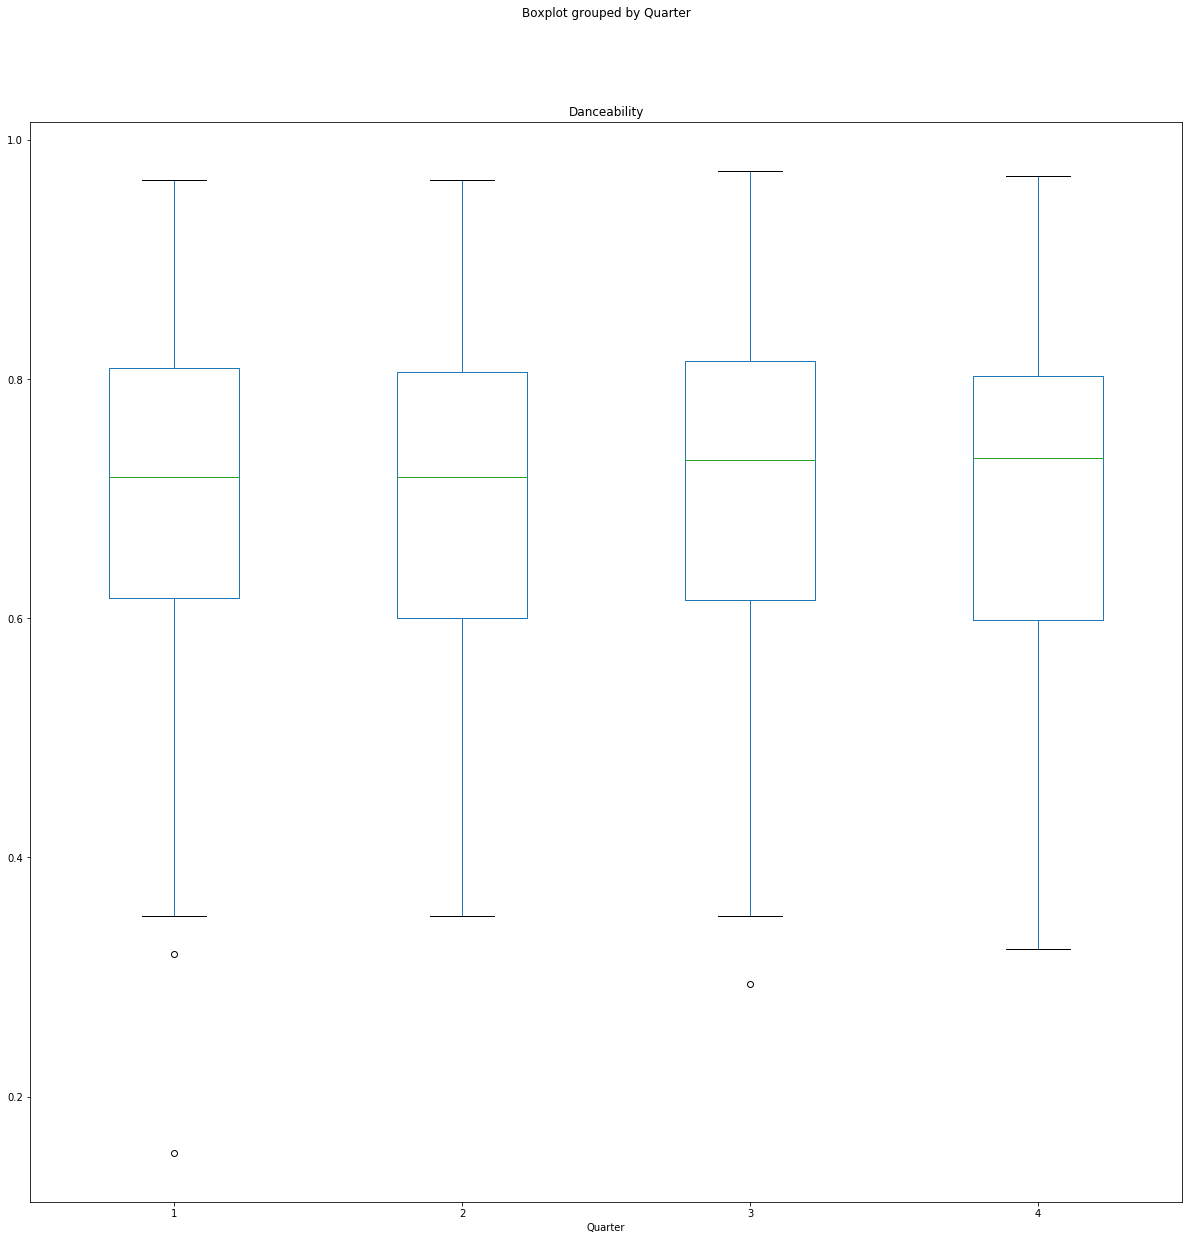

In [26]:
merged_df.boxplot(column = 'Danceability', by='Quarter', figsize=(20,20), grid=False)
#dance_df = merged_df[['Danceability']]
#dance_df.boxplot(by='Quarter')

### Finding any possible correlation between danceability and popularity

Q1: The correlation between Danceability and Popularity is -0.09
Q2: The correlation between Danceability and Popularity is -0.1
Q3: The correlation between Danceability and Popularity is 0.05
Q4: The correlation between Danceability and Popularity is 0.0


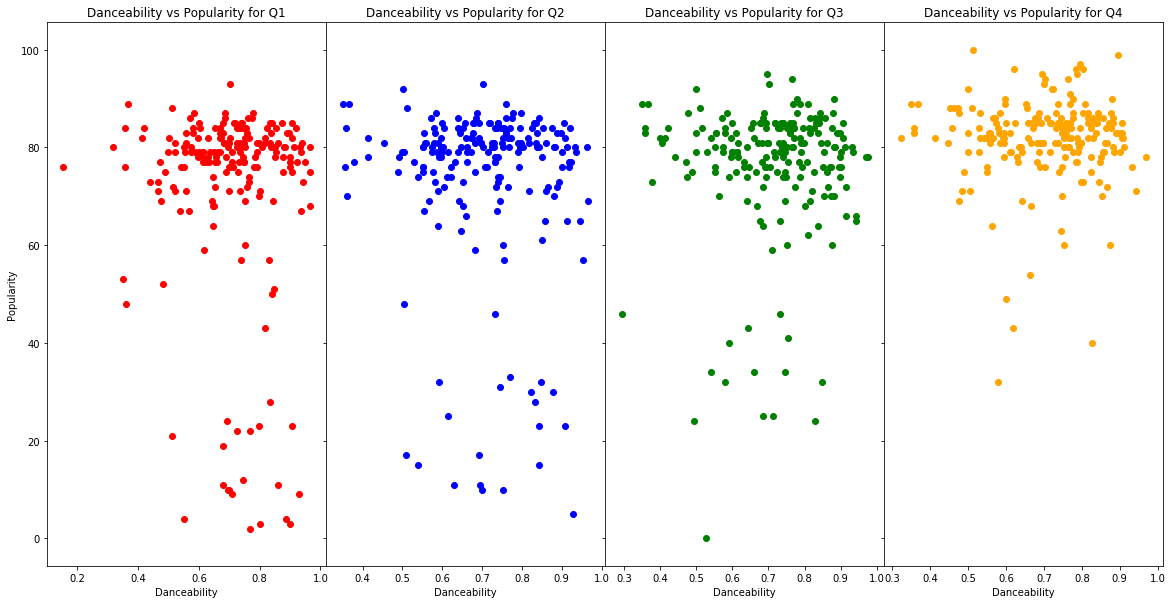

In [49]:
do_corr_analysis(quart_df_list, 'Danceability', 'Popularity')

### Finding any possible correlation between danceability and streams

Q1: The correlation between Danceability and Streams is 0.08
Q2: The correlation between Danceability and Streams is 0.14
Q3: The correlation between Danceability and Streams is -0.0
Q4: The correlation between Danceability and Streams is 0.01


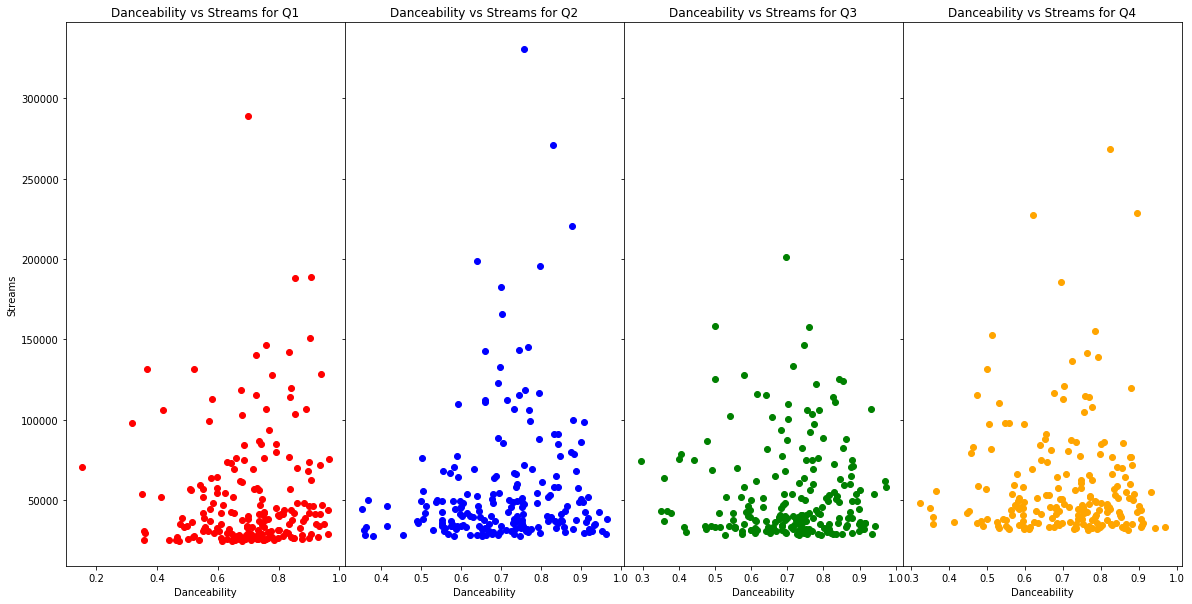

In [51]:
do_corr_analysis(quart_df_list, 'Danceability', 'Streams')

### Analyzing danceability histogram

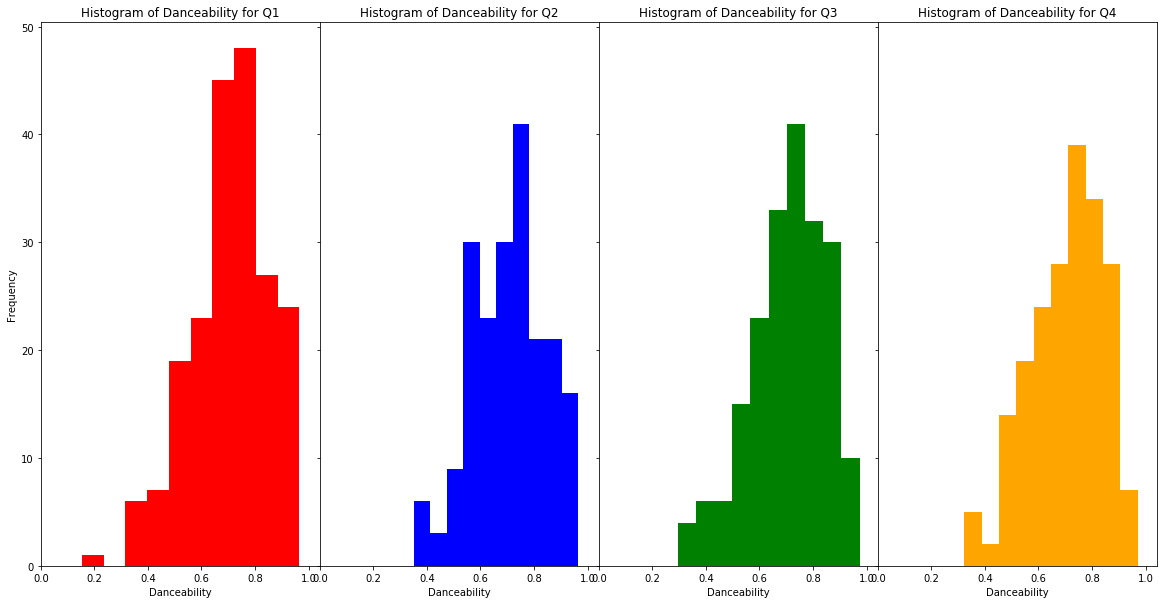

In [80]:
do_histogram(quart_df_list, 'Danceability')

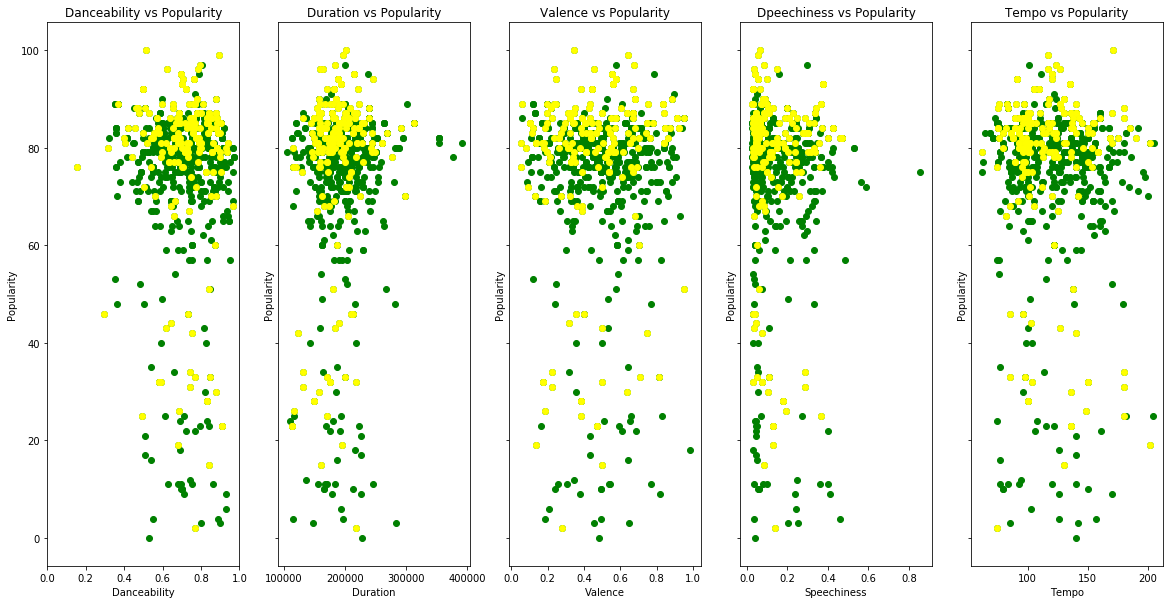

In [156]:
## finding top 50 tracks of each quarter and group them for the entire year

top_50_q1=df_Q1.head(50)
top_50_q2=df_Q2.head(50)
top_50_q3=df_Q3.head(50)
top_50_q4=df_Q4.head(50)
frames=[top_50_q1,top_50_q2,top_50_q3,top_50_q4]
top_50_year=pd.concat(frames)

#Combining all top 200 songs into one data frame for the entire year and take the list minus the first 50

frames_year=[df_Q1,df_Q2,df_Q3,df_Q4]
top_200_year=pd.concat(frames_year)

#Plotting data

fig2, axs = plt.subplots(1,5,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0.2},figsize=(20,10))
ax1, ax2, ax3, ax4, ax5 = axs

#Plotting Danceability versus Popularity
ax1.scatter(top_200_year['Danceability'], top_200_year['Popularity'],color='green')
ax1.scatter(top_50_year['Danceability'], top_50_year['Popularity'],color='yellow')
ax1.set_title('Danceability vs Popularity')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Popularity')
ax1.set_xlim(0,1)


#Plotting Duration versus Popularity
ax2.scatter(top_200_year['Duration'], top_200_year['Popularity'],color='green')
ax2.scatter(top_50_year['Duration'], top_50_year['Popularity'],color='yellow')
ax2.set_title('Duration vs Popularity')
ax2.set_xlabel('Duration')

ax3.scatter(top_200_year['Valence'], top_200_year['Popularity'],color='green')
ax3.scatter(top_50_year['Valence'], top_50_year['Popularity'],color='yellow')
ax3.set_title('Valence vs Popularity')
ax3.set_xlabel('Valence')

ax4.scatter(top_200_year['Speechiness'], top_200_year['Popularity'],color='green')
ax4.scatter(top_50_year['Speechiness'], top_50_year['Popularity'],color='yellow')
ax4.set_title('Dpeechiness vs Popularity')
ax4.set_xlabel('Speechiness')

ax5.scatter(top_200_year['Tempo'], top_200_year['Popularity'],color='green')
ax5.scatter(top_50_year['Tempo'], top_50_year['Popularity'],color='yellow')
ax5.set_title('Tempo vs Popularity')
ax5.set_xlabel('Tempo')


for label in axs:
    label.set_ylabel('Popularity')

plt.show()

In [157]:
#ANOVA for danceability for each quarter
group_dance_Q1 = df_Q1["Danceability"]
group_dance_Q2 = df_Q2["Danceability"]
group_dance_Q3 = df_Q3["Danceability"]
group_dance_Q4 = df_Q4["Danceability"]

f_oneway(group_dance_Q1,group_dance_Q2,group_dance_Q3,group_dance_Q4)

F_onewayResult(statistic=0.08490765223875946, pvalue=0.968284960476382)

Results shows that there is no statistically significant difference between Dacnceability amongst the 4 quarters 





In [158]:
#ANOVA for danceability for each quarter
f_oneway(group_dance_Q1,group_dance_Q1.head(50))

F_onewayResult(statistic=0.3205114707785049, pvalue=0.5718123547920076)

Results shows that there is no statistically significant difference between Dacnceability of first 50 songs of Q1 and the remainder of Q1




# Speechiness Analysis

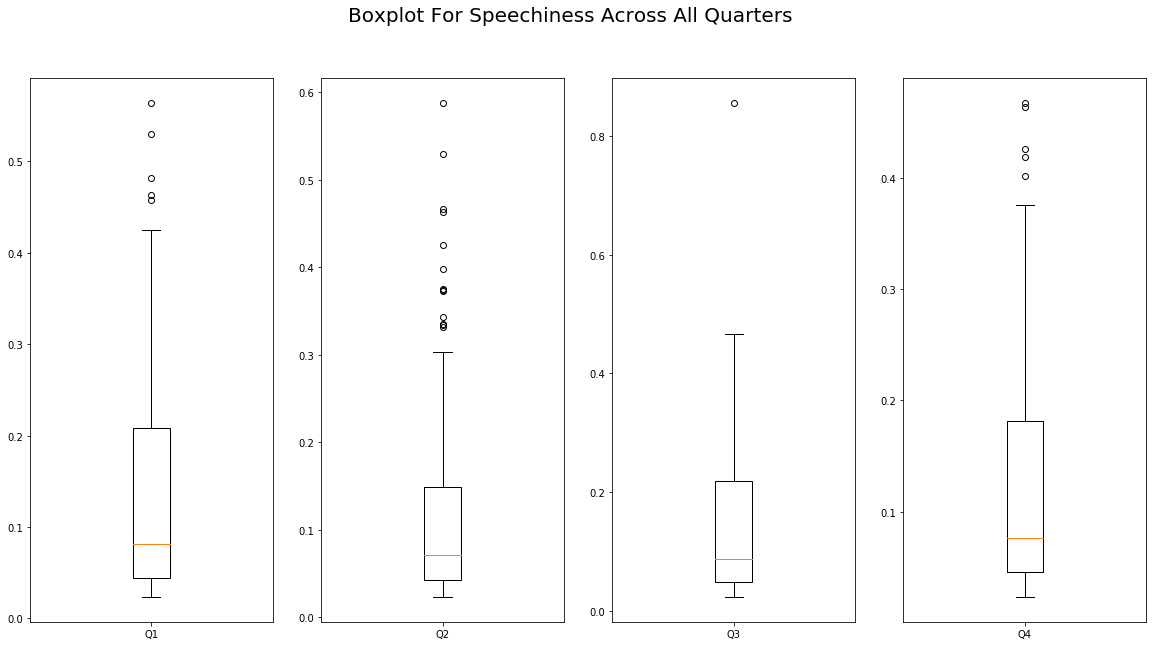

In [43]:
do_boxplot(quart_df_list, 'Speechiness')

### Finding any possible correlation between Speechiness and Popularity

Q1: The correlation between Speechiness and Popularity is -0.13
Q2: The correlation between Speechiness and Popularity is 0.01
Q3: The correlation between Speechiness and Popularity is -0.02
Q4: The correlation between Speechiness and Popularity is 0.02


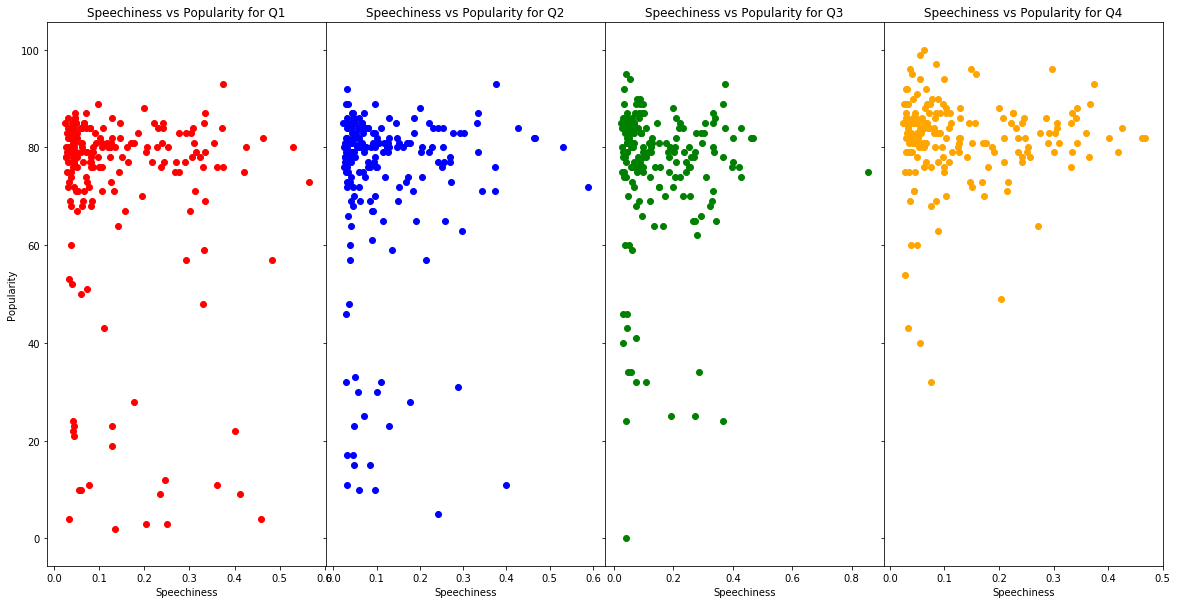

In [52]:
do_corr_analysis(quart_df_list, 'Speechiness', 'Popularity')

### Finding any possible correlation between Speechiness and Streams

Q1: The correlation between Speechiness and Streams is 0.17
Q2: The correlation between Speechiness and Streams is -0.01
Q3: The correlation between Speechiness and Streams is -0.02
Q4: The correlation between Speechiness and Streams is -0.07


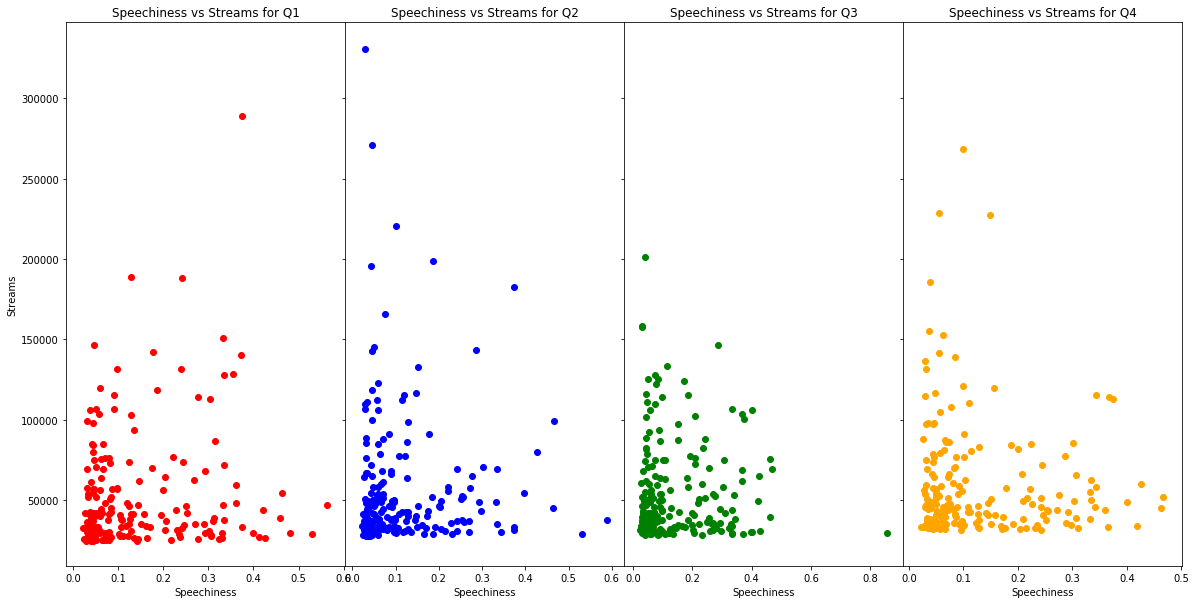

In [53]:
do_corr_analysis(quart_df_list, 'Speechiness', 'Streams')

### Analyzing Speechiness histogram

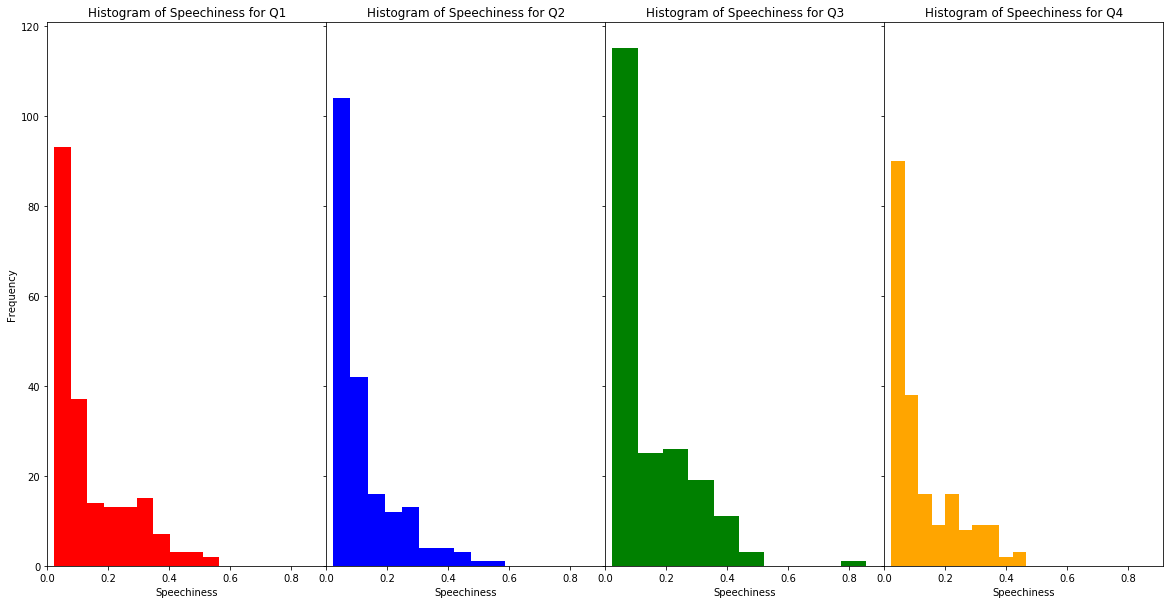

In [81]:
do_histogram(quart_df_list, 'Speechiness')

In [27]:
#ANOVA for Speechiness for each quarter
group_speech_Q1 = df_Q1["Speechiness"]
group_speech_Q2 = df_Q2["Speechiness"]
group_speech_Q3 = df_Q3["Speechiness"]
group_speech_Q4 = df_Q4["Speechiness"]

f_oneway(group_speech_Q1,group_speech_Q2,group_speech_Q3,group_speech_Q4)

F_onewayResult(statistic=2.2297619517309726, pvalue=0.08335865914750178)

Results shows that there is no statistically significant difference between Speechiness amongst the 4 quarters

# Valence Analysis

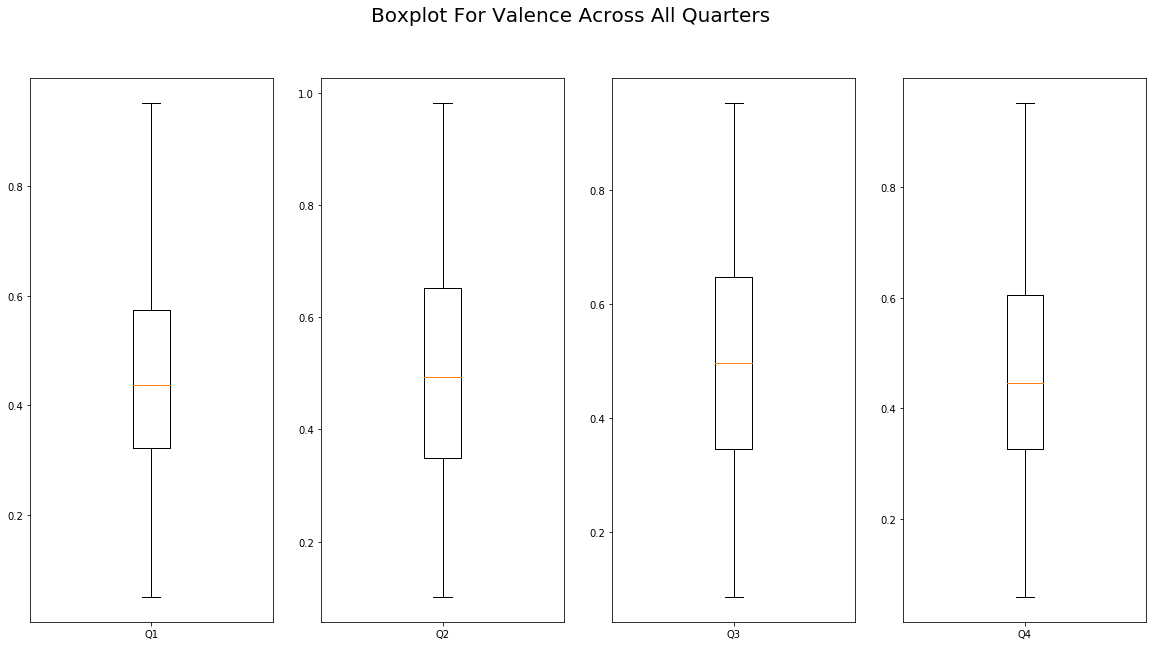

In [44]:
do_boxplot(quart_df_list, 'Valence')


### Finding any possible correlation between Valence and Popularity

Q1: The correlation between Valence and Popularity is 0.0
Q2: The correlation between Valence and Popularity is -0.06
Q3: The correlation between Valence and Popularity is 0.0
Q4: The correlation between Valence and Popularity is 0.05


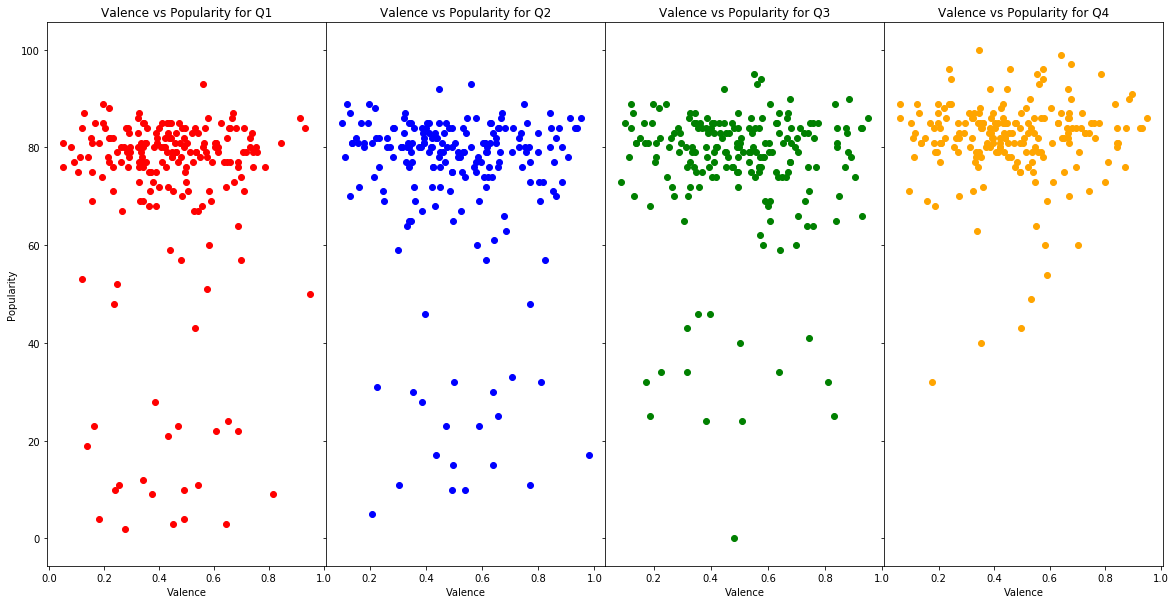

In [85]:
do_corr_analysis(quart_df_list, 'Valence', 'Popularity')

### Finding any possible correlation between Valence and Streams

Q1: The correlation between Valence and Streams is -0.07
Q2: The correlation between Valence and Streams is -0.02
Q3: The correlation between Valence and Streams is -0.02
Q4: The correlation between Valence and Streams is 0.03


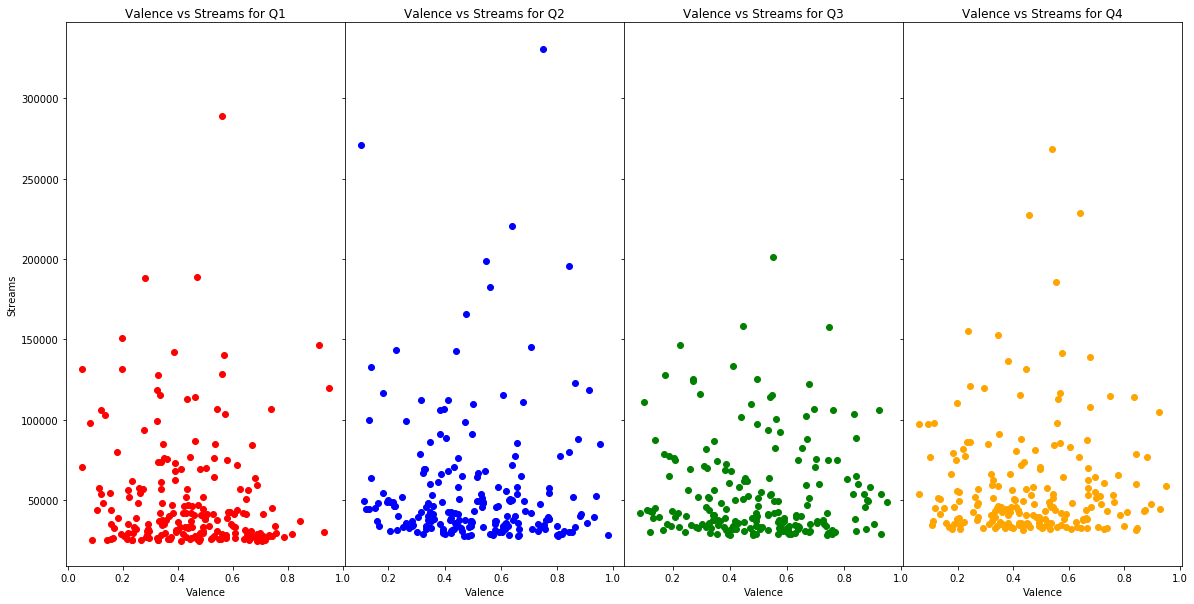

In [86]:
do_corr_analysis(quart_df_list, 'Valence', 'Streams')

### Analyzing Speechiness histogram

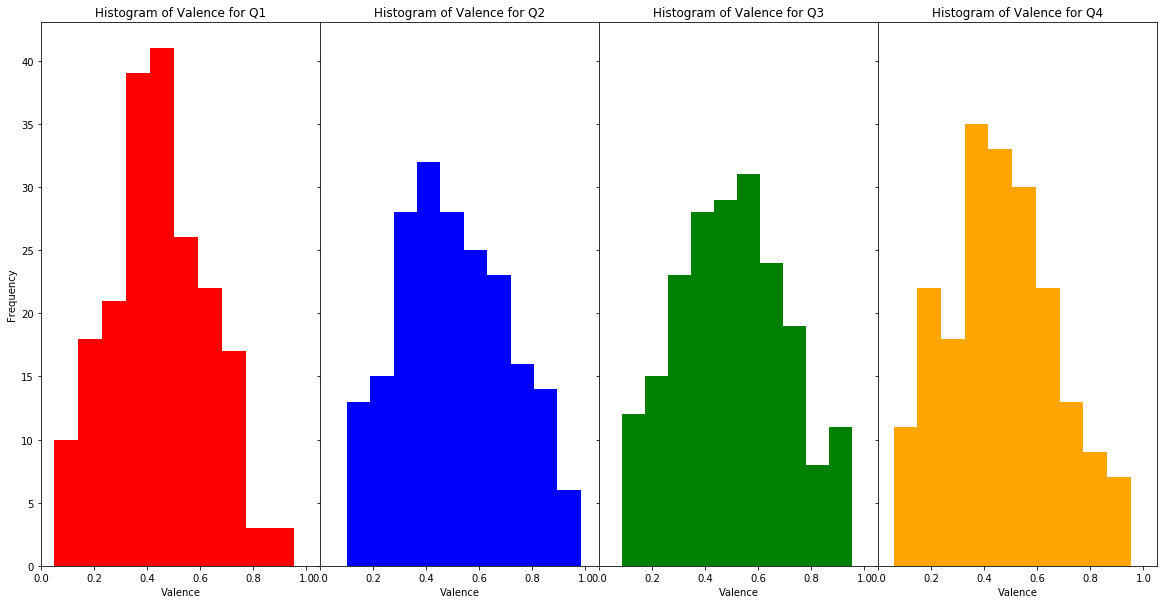

In [82]:
do_histogram(quart_df_list, 'Valence')

In [87]:
#ANOVA for Valence for each quarter
Valence_dance_Q1 = df_Q1["Valence"]
Valence_dance_Q2 = df_Q2["Valence"]
Valence_dance_Q3 = df_Q3["Valence"]
Valence_dance_Q4 = df_Q4["Valence"]

f_oneway(Valence_dance_Q1,Valence_dance_Q2,Valence_dance_Q3,Valence_dance_Q4)

F_onewayResult(statistic=4.860108563926755, pvalue=0.0023442038237384186)

With a p-value of 0.0023 Results shows that there is a statistically significant difference between Valence amongst the 4 quarters.

# Tempo Analysis

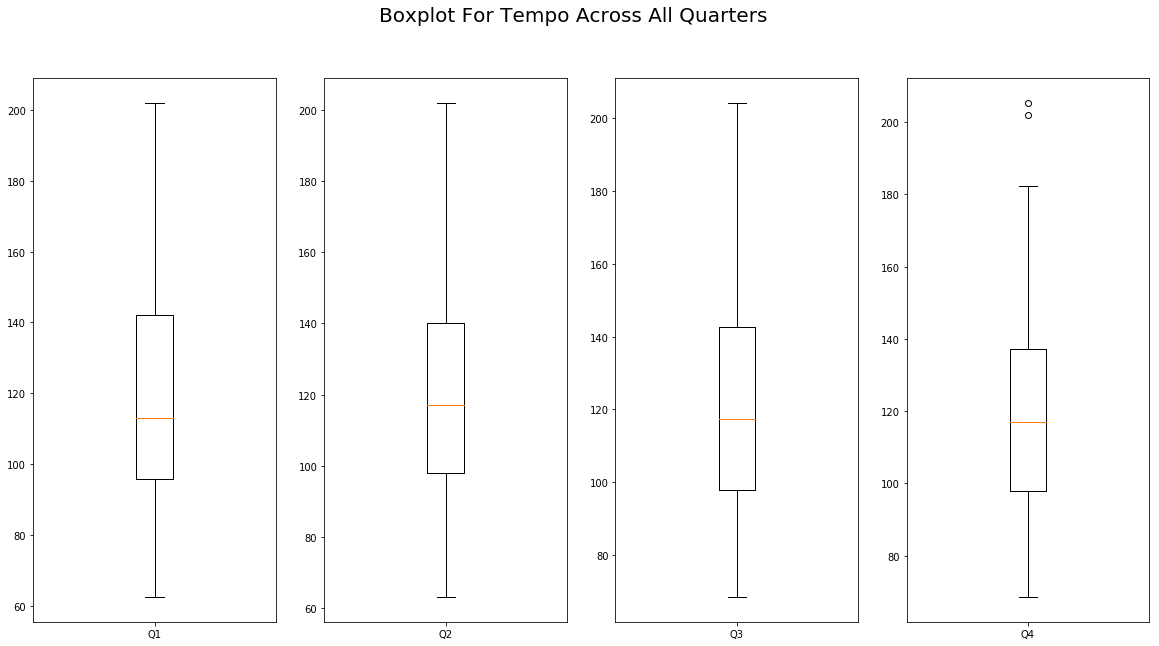

In [45]:
do_boxplot(quart_df_list, 'Tempo')

### Finding any possible correlation between Tempo and Popularity

Q1: The correlation between Tempo and Popularity is -0.07
Q2: The correlation between Tempo and Popularity is -0.0
Q3: The correlation between Tempo and Popularity is -0.14
Q4: The correlation between Tempo and Popularity is -0.01


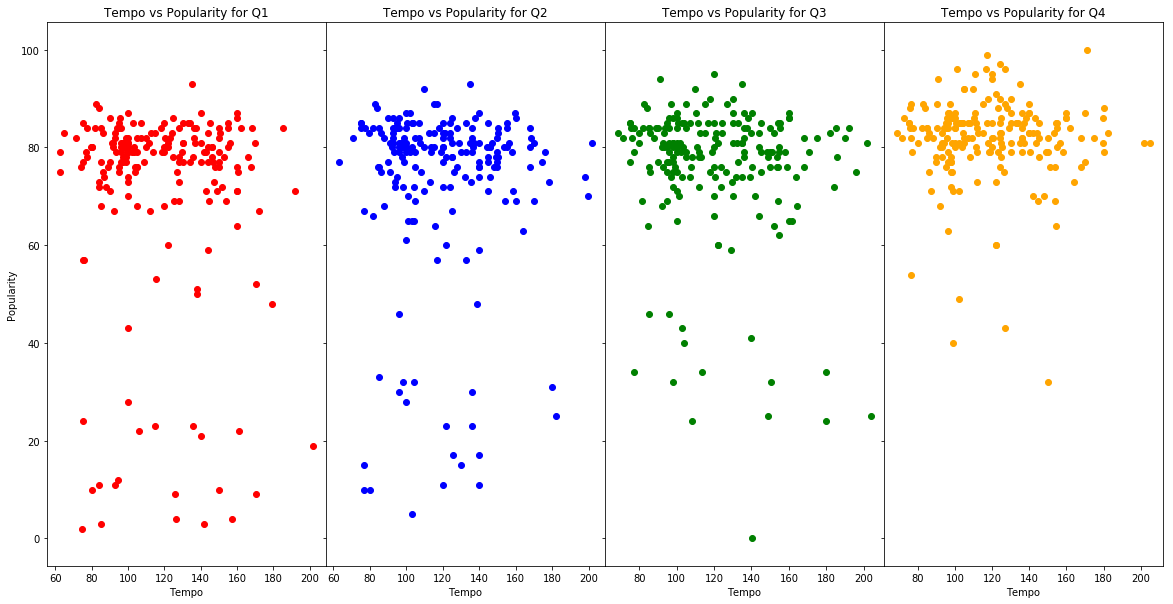

In [88]:
do_corr_analysis(quart_df_list, 'Tempo', 'Popularity')

### Finding any possible correlation between Tempo and Streams

Q1: The correlation between Tempo and Streams is 0.02
Q2: The correlation between Tempo and Streams is -0.1
Q3: The correlation between Tempo and Streams is 0.01
Q4: The correlation between Tempo and Streams is -0.0


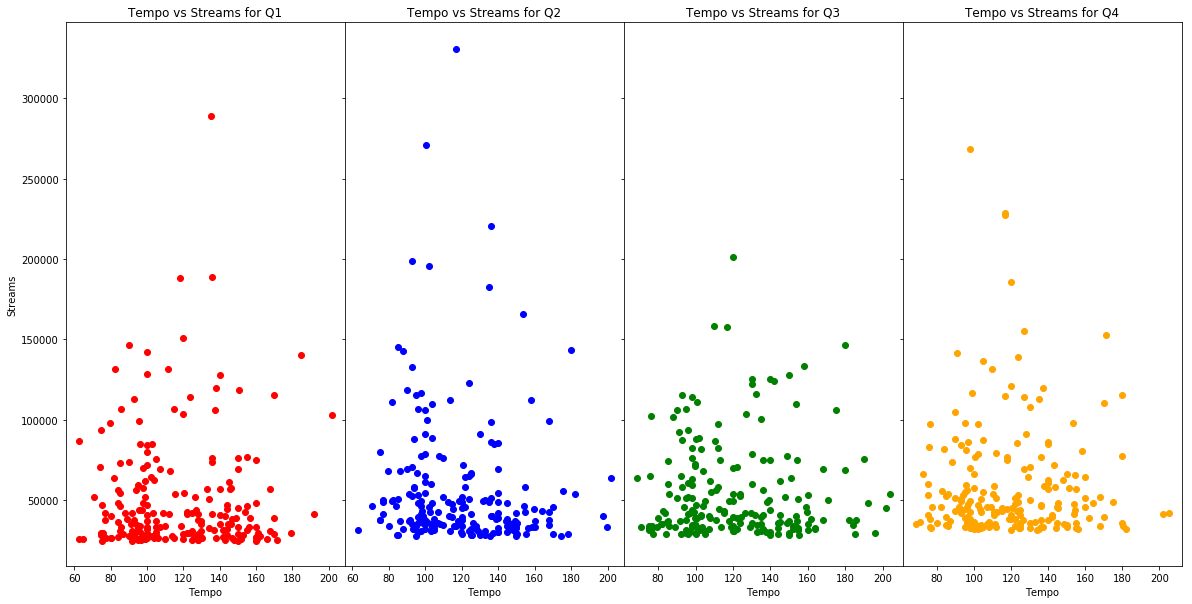

In [89]:
do_corr_analysis(quart_df_list, 'Tempo', 'Streams')

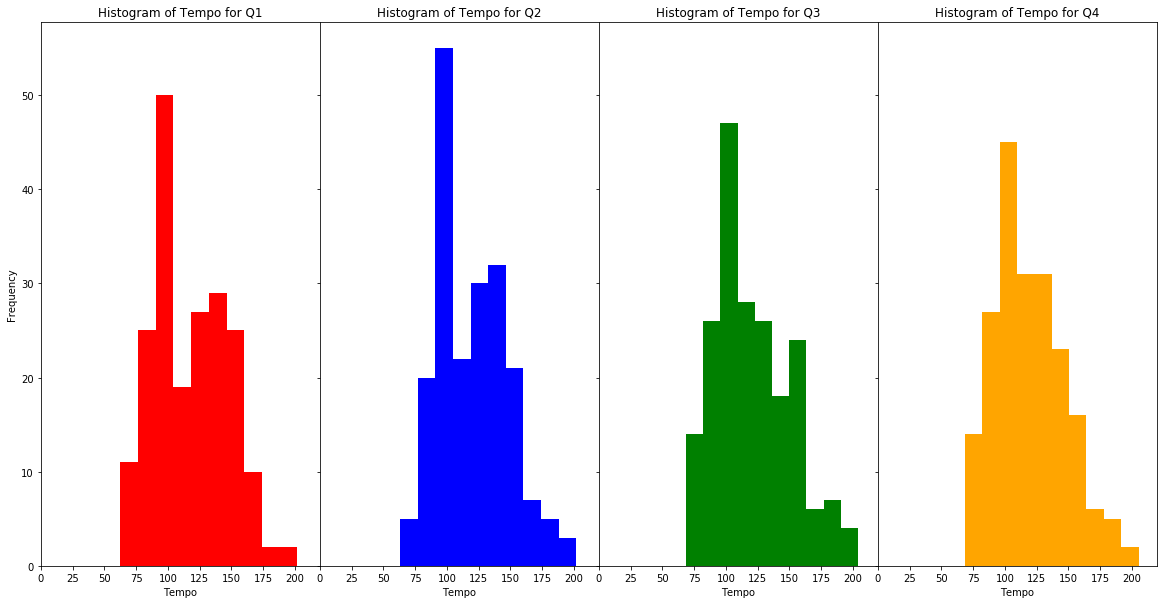

In [83]:
do_histogram(quart_df_list, 'Tempo')

In [39]:
Q1_tempo_summary=df_Q1['Tempo'].describe()
Q2_tempo_summary=df_Q2['Tempo'].describe()
Q3_tempo_summary=df_Q3['Tempo'].describe()
Q4_tempo_summary=df_Q4['Tempo'].describe()
dff=[Q1_tempo_summary,Q2_tempo_summary,Q3_tempo_summary,Q4_tempo_summary]
Tempo_summary_df=pd.DataFrame(dff, index=(["Q1","Q2","Q3","Q4"]))
Tempo_summary_df

,count,mean,std,min,25%,50%,75%,max
Q1,200.0,117.806420,29.191265,62.446,95.66575,113.1580,142.21050,202.006
Q2,200.0,119.556690,28.182540,63.050,97.91125,116.9625,140.02200,202.015
Q3,200.0,120.992890,30.047519,68.534,97.98550,117.4550,142.53925,204.096
Q4,200.0,118.938155,27.882898,68.534,97.97525,116.9690,137.21700,205.272


### Mean Analysis of variables 

In [41]:
Quarters_mean_summary={"Streams":{"Q1":df_Q1['Streams'].mean(),"Q2":df_Q2['Streams'].mean(),"Q3":df_Q3['Streams'].mean(),"Q4":df_Q4['Streams'].mean()},
                "Tempo":{"Q1":df_Q1['Tempo'].mean(),"Q2":df_Q2['Tempo'].mean(),"Q3":df_Q3['Tempo'].mean(),"Q4":df_Q4['Tempo'].mean()},
                "Valence":{"Q1":df_Q1['Valence'].mean(),"Q2":df_Q2['Valence'].mean(),"Q3":df_Q3['Valence'].mean(),"Q4":df_Q4['Valence'].mean()},
                "Speechiness":{"Q1":df_Q1['Speechiness'].mean(),"Q2":df_Q2['Speechiness'].mean(),"Q3":df_Q3['Speechiness'].mean(),"Q4":df_Q4['Speechiness'].mean()},
                "Danceability":{"Q1":df_Q1['Danceability'].mean(),"Q2":df_Q2['Danceability'].mean(),"Q3":df_Q3['Danceability'].mean(),"Q4":df_Q4['Danceability'].mean()}}
pd.DataFrame(Quarters_mean_summary)

,Streams,Tempo,Valence,Speechiness,Danceability
Q1,51413.46,117.806420,0.441819,0.137655,0.705750
Q2,56983.13,119.556690,0.508215,0.116193,0.706060
Q3,54346.11,120.992890,0.501311,0.143260,0.711440
Q4,58987.33,118.938155,0.463131,0.124981,0.705295


### Average Tempo in Quarters

In [226]:
print(f'The average tempo of bottom 50 songs vs top 50 songs in Q1 {round(Q1_b50_df.Tempo.mean(),4)} vs {round(Q1_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q2 {round(Q2_b50_df.Tempo.mean(),4)} vs {round(Q2_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q3 {round(Q3_b50_df.Tempo.mean(),4)} vs {round(Q3_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q4 {Q4_b50_df.Tempo.mean()} vs {Q4_t50_df.Tempo.mean()}')

The average tempo of bottom 50 songs vs top 50 songs in Q1 115.9715 vs 115.9733
The average tempo of bottom 50 songs vs top 50 songs in Q2 128.1745 vs 113.7046
The average tempo of bottom 50 songs vs top 50 songs in Q3 121.3086 vs 120.3106
The average tempo of bottom 50 songs vs top 50 songs in Q4 120.53556 vs 118.87192


In [64]:
print(f'Pvalue for overall tempo 2019 is {round(f_oneway(df_Q1.Tempo,df_Q2.Tempo,df_Q3.Tempo,df_Q4.Tempo)[1],4)}')

Pvalue for overall tempo 2019 is 0.7357


# Duration Analysis

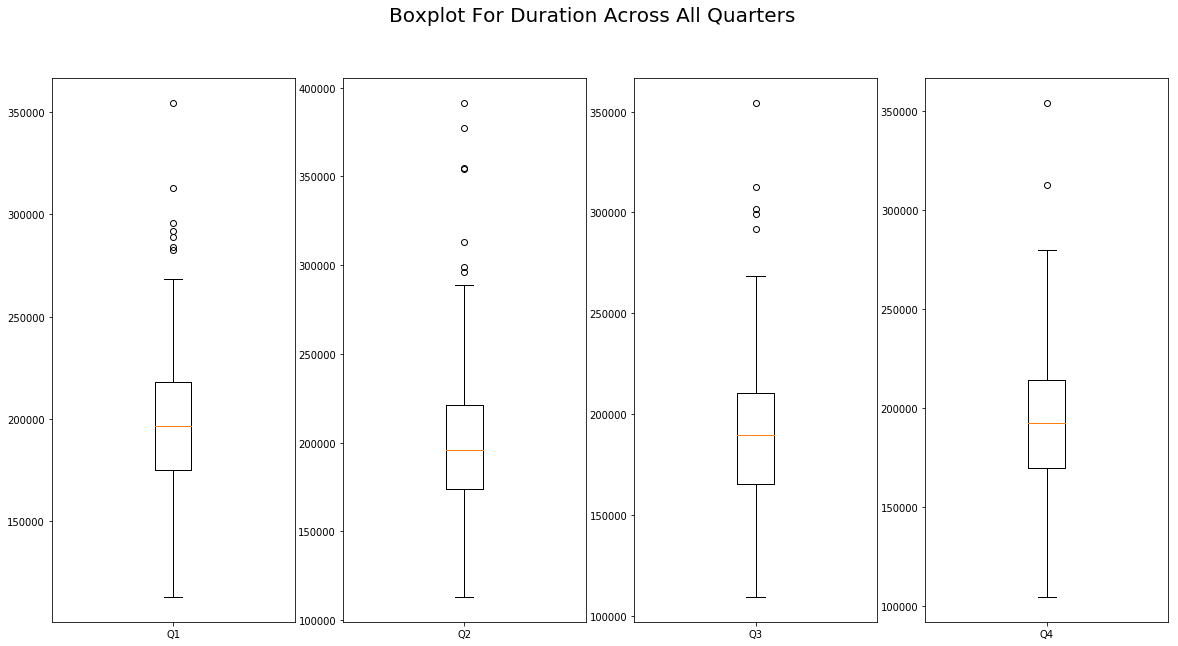

In [46]:
do_boxplot(quart_df_list, 'Duration')

### Finding any possible correlation between Duration and Popularity

Q1: The correlation between Duration and Popularity is 0.12
Q2: The correlation between Duration and Popularity is 0.16
Q3: The correlation between Duration and Popularity is 0.19
Q4: The correlation between Duration and Popularity is 0.09


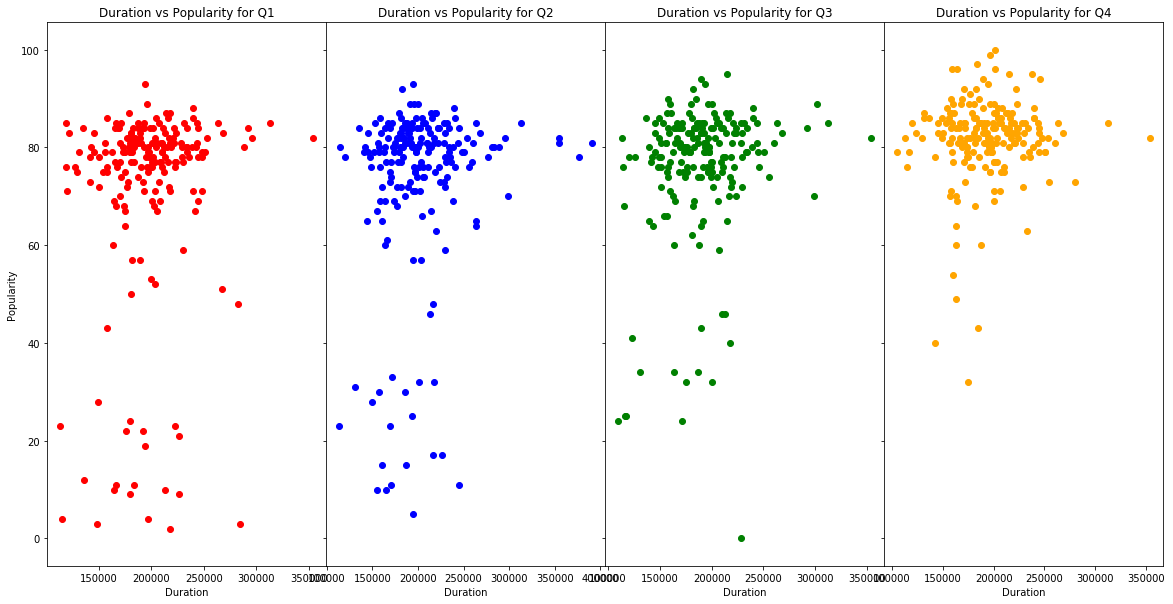

In [93]:
do_corr_analysis(quart_df_list, 'Duration', 'Popularity')

### Finding any possible correlation between Duration and Streams

Q1: The correlation between Duration and Streams is -0.07
Q2: The correlation between Duration and Streams is -0.16
Q3: The correlation between Duration and Streams is -0.12
Q4: The correlation between Duration and Streams is -0.03


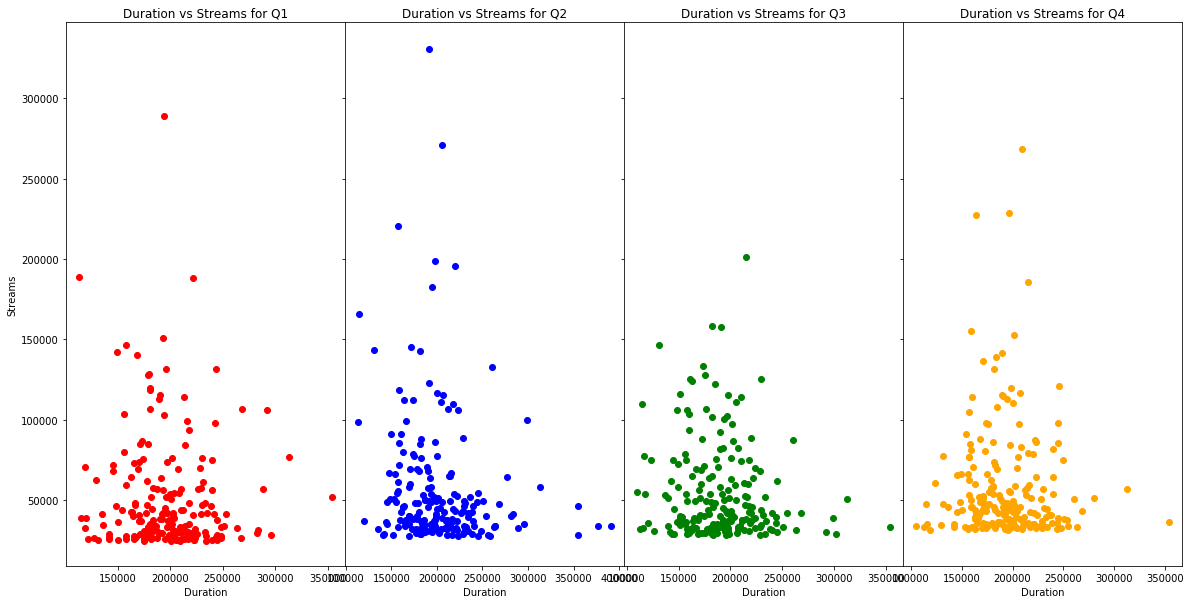

In [94]:
do_corr_analysis(quart_df_list, 'Duration', 'Streams')

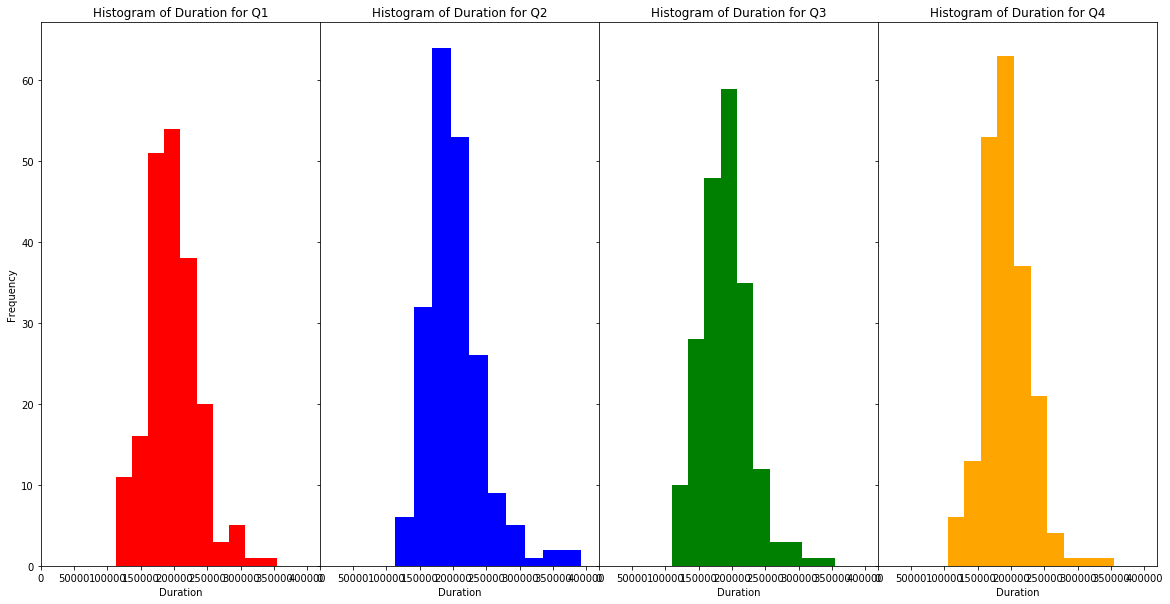

In [84]:
do_histogram(quart_df_list, 'Duration')

In [95]:
stats.f_oneway(df_Q1['Duration'], df_Q2['Duration'], df_Q3['Duration'], df_Q4['Duration'])

F_onewayResult(statistic=3.431485492240734, pvalue=0.016671608840744513)

With a p-value of 0.01667 Results shows that there is a statistically significant difference between Duration amongst the 4 quarters.

# Correlation Between Audio Features

Q1: The correlation between Danceability and Valence is 0.24
Q2: The correlation between Danceability and Valence is 0.05
Q3: The correlation between Danceability and Valence is 0.35
Q4: The correlation between Danceability and Valence is 0.3


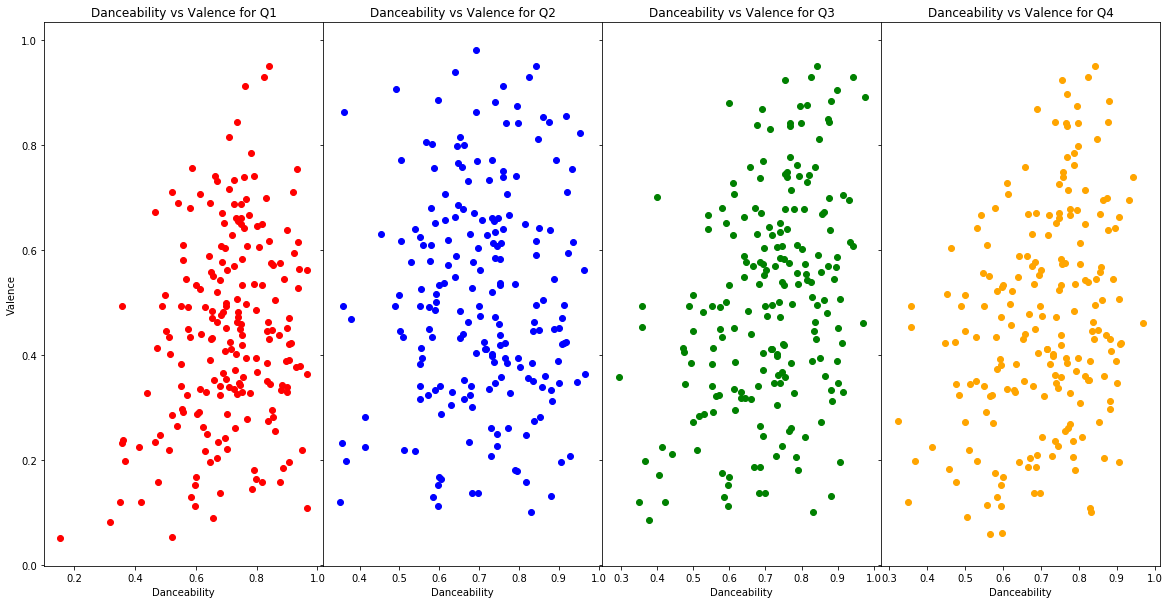

In [98]:
do_corr_analysis(quart_df_list,'Danceability', 'Valence')

Q1: The correlation between Danceability and Tempo is 0.02
Q2: The correlation between Danceability and Tempo is -0.12
Q3: The correlation between Danceability and Tempo is -0.03
Q4: The correlation between Danceability and Tempo is 0.01


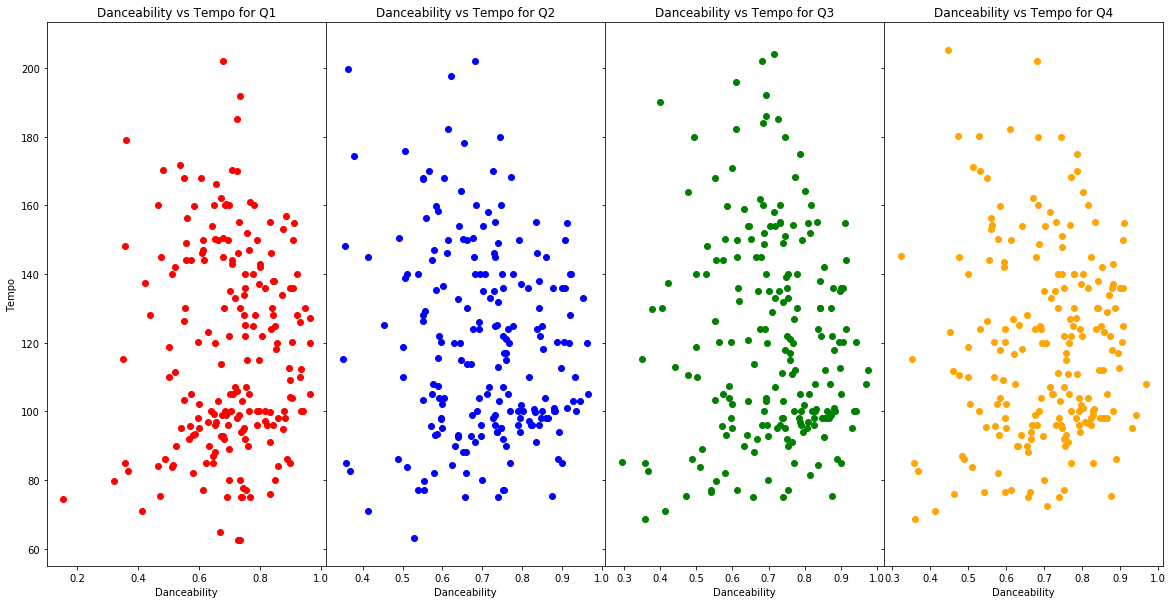

In [99]:
do_corr_analysis(quart_df_list,'Danceability', 'Tempo')

Q1: The correlation between Danceability and Speechiness is 0.35
Q2: The correlation between Danceability and Speechiness is 0.34
Q3: The correlation between Danceability and Speechiness is 0.24
Q4: The correlation between Danceability and Speechiness is 0.27


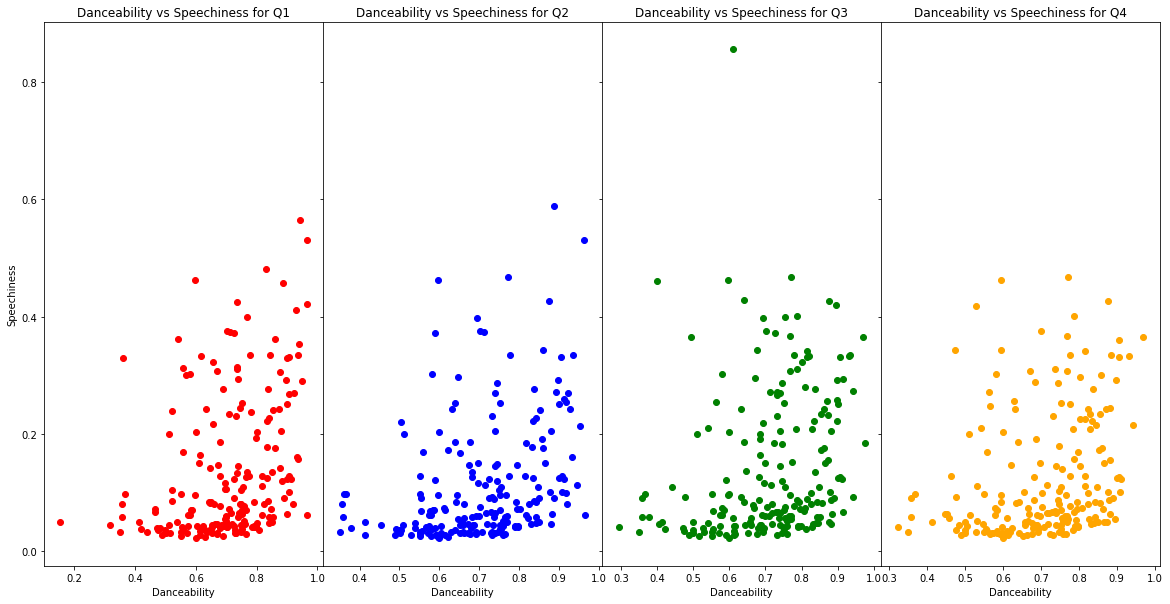

In [100]:
do_corr_analysis(quart_df_list,'Danceability', 'Speechiness')

Q1: The correlation between Danceability and Duration is -0.18
Q2: The correlation between Danceability and Duration is -0.29
Q3: The correlation between Danceability and Duration is -0.3
Q4: The correlation between Danceability and Duration is -0.21


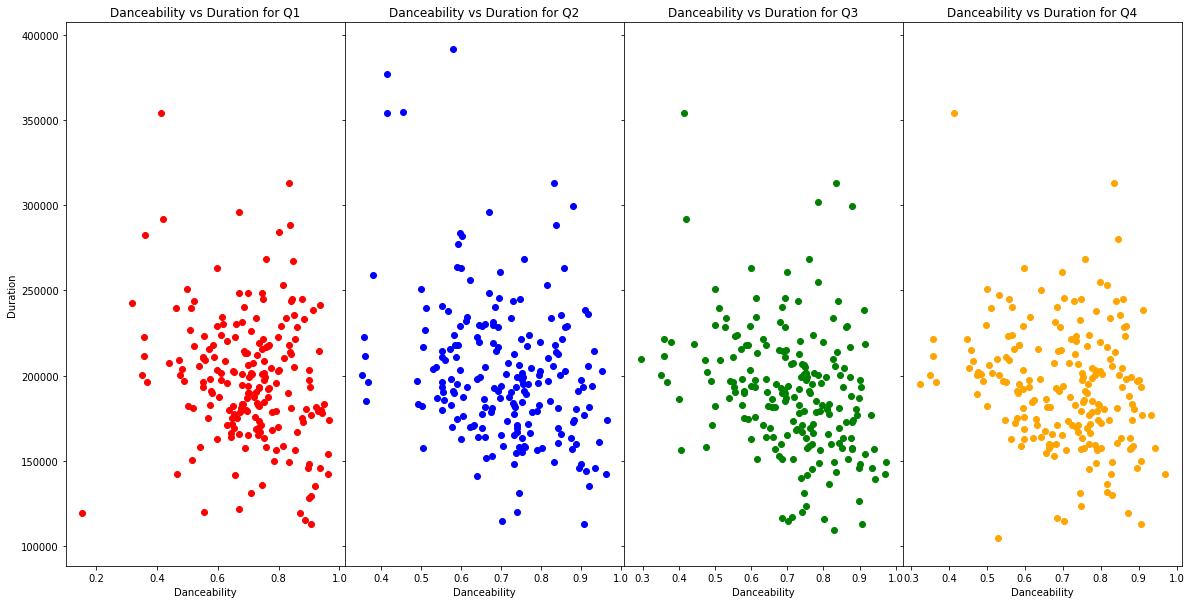

In [102]:
do_corr_analysis(quart_df_list,'Danceability', 'Duration')

Q1: The correlation between Duration and Tempo is 0.1
Q2: The correlation between Duration and Tempo is 0.0
Q3: The correlation between Duration and Tempo is -0.15
Q4: The correlation between Duration and Tempo is -0.1


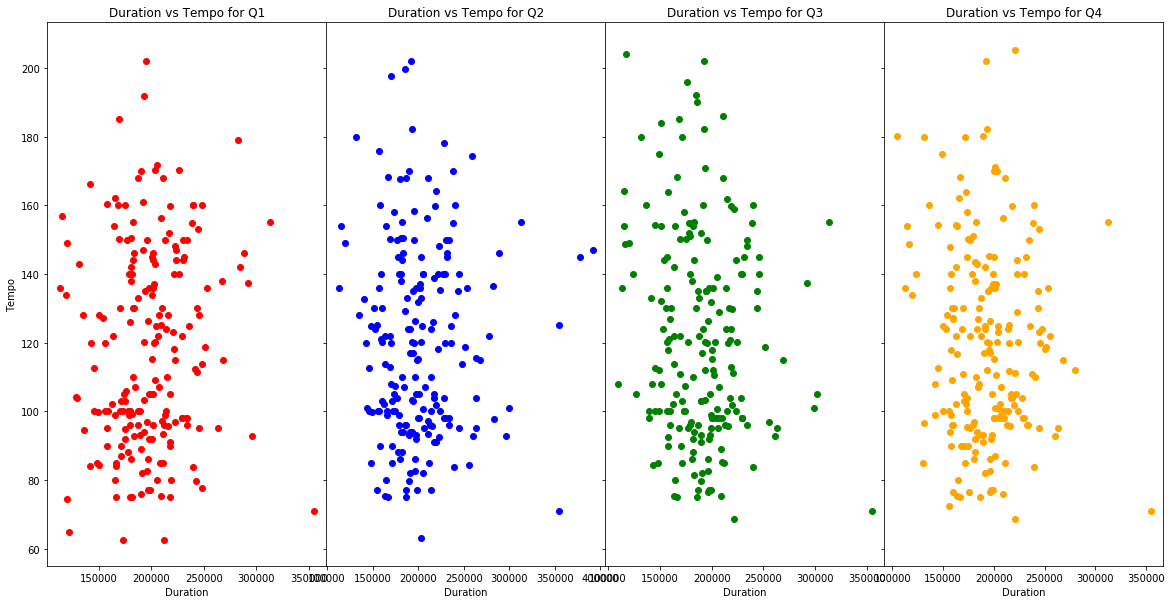

In [103]:
do_corr_analysis(quart_df_list,'Duration', 'Tempo')

Q1: The correlation between Duration and Speechiness is -0.23
Q2: The correlation between Duration and Speechiness is -0.2
Q3: The correlation between Duration and Speechiness is -0.25
Q4: The correlation between Duration and Speechiness is -0.28


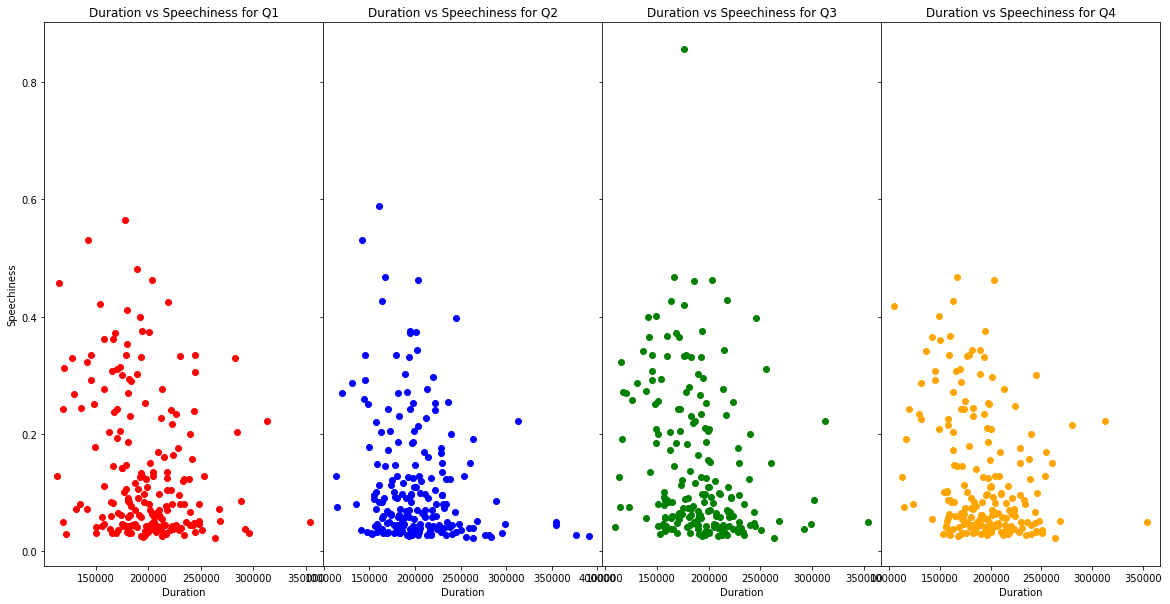

In [104]:
do_corr_analysis(quart_df_list,'Duration', 'Speechiness')

Q1: The correlation between Duration and Valence is -0.07
Q2: The correlation between Duration and Valence is -0.05
Q3: The correlation between Duration and Valence is -0.23
Q4: The correlation between Duration and Valence is -0.12


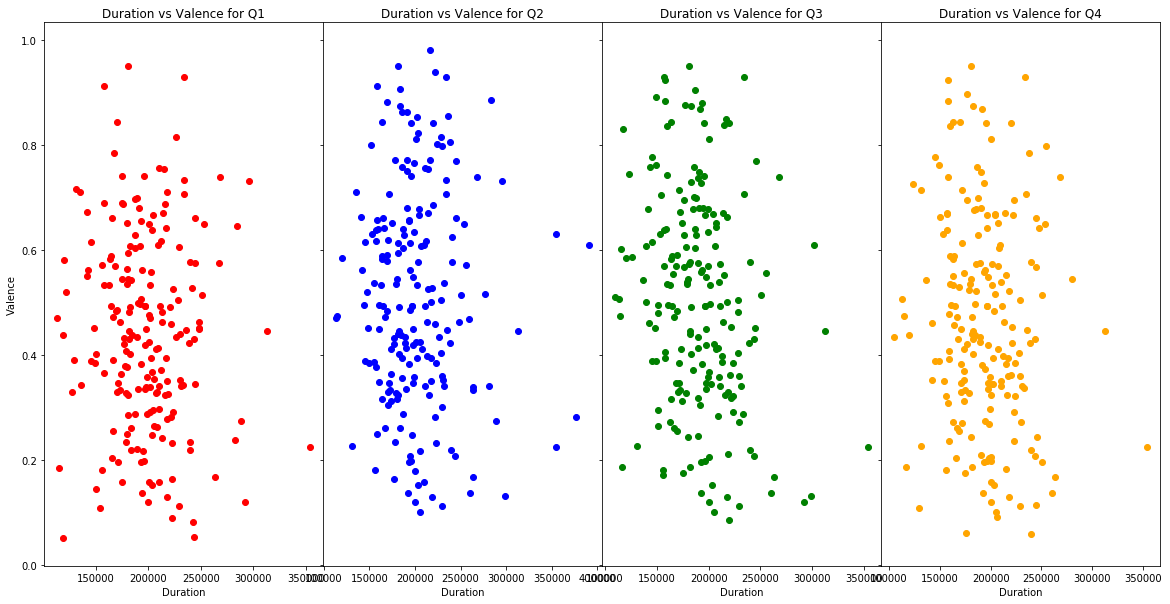

In [105]:
do_corr_analysis(quart_df_list,'Duration', 'Valence')

Q1: The correlation between Tempo and Valence is -0.0
Q2: The correlation between Tempo and Valence is 0.0
Q3: The correlation between Tempo and Valence is 0.04
Q4: The correlation between Tempo and Valence is -0.06


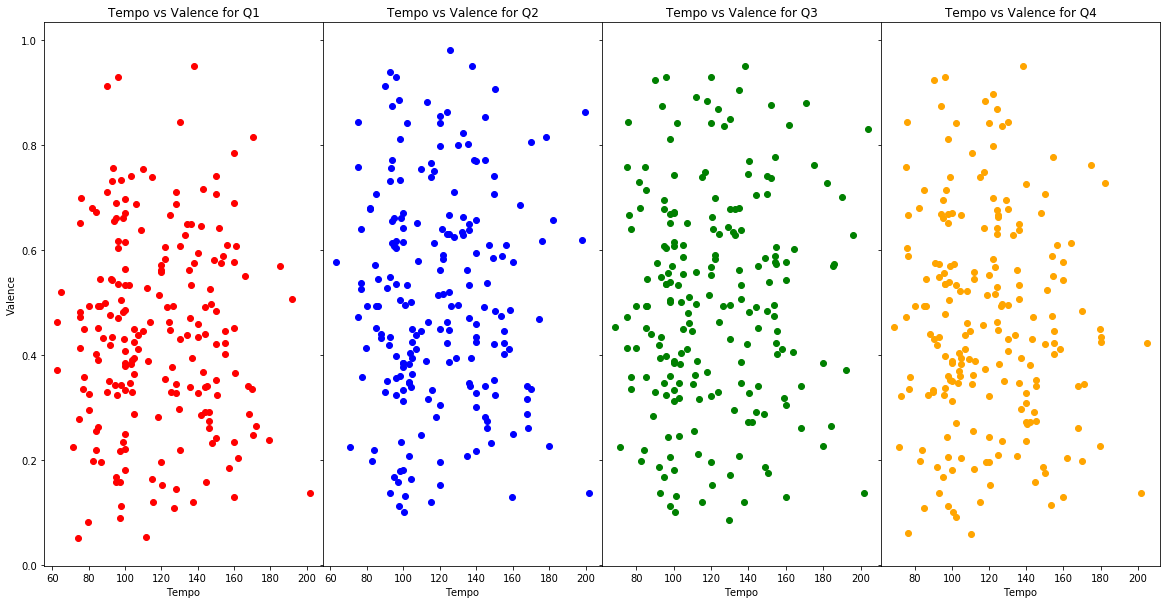

In [106]:
do_corr_analysis(quart_df_list,'Tempo', 'Valence')

Q1: The correlation between Tempo and Speechiness is 0.08
Q2: The correlation between Tempo and Speechiness is 0.1
Q3: The correlation between Tempo and Speechiness is 0.28
Q4: The correlation between Tempo and Speechiness is 0.25


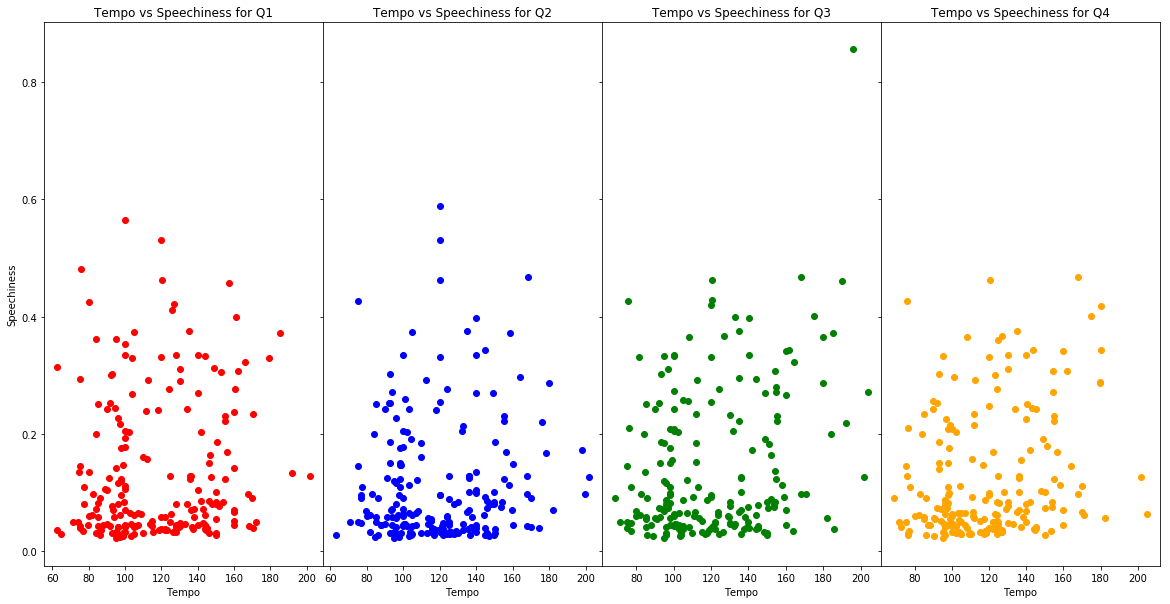

In [107]:
do_corr_analysis(quart_df_list,'Tempo', 'Speechiness')